Random points initialized: [[ 93  13]
 [230 293]
 [126  58]
 [104 118]
 [186 263]
 [255 237]
 [142  14]
 [220  37]
 [254 135]
 [251 297]
 [252  14]
 [ 36 101]
 [256 278]
 [201 187]
 [292  95]
 [250 261]
 [ 66 127]
 [104 121]
 [ 49  75]
 [ 40 194]
 [ 28 234]
 [ 55 189]
 [174  96]
 [123  27]
 [230 204]
 [126 111]
 [203 115]
 [137 273]
 [242 181]
 [ 77  79]
 [100   5]
 [ 60 168]
 [114 126]
 [ 11  29]
 [113 208]
 [218 146]
 [122  29]
 [129   4]
 [116 122]
 [ 36  62]
 [ 22 250]
 [177  28]
 [ 22 160]
 [291 294]
 [ 30  99]
 [100 231]
 [ 94  31]
 [122 297]
 [284 203]
 [192 172]
 [ 20 173]
 [ 38  14]
 [155 229]
 [137 207]
 [ 26 122]
 [210 120]
 [ 15  26]
 [158 139]
 [215 140]
 [194  45]
 [148 129]
 [ 86  73]
 [178 109]
 [ 90  53]
 [116 207]
 [ 37 195]
 [ 35  91]
 [201 212]
 [213 204]
 [150 113]
 [171 145]
 [ 96  16]
 [164  95]
 [161 100]
 [205 119]
 [ 90 106]
 [207 157]
 [ 60  19]
 [162  69]
 [ 83 140]
 [  9 144]
 [119   9]
 [ 97  87]
 [ 55  77]
 [  5 208]
 [ 72 150]
 [200  57]
 [133 103]
 [184

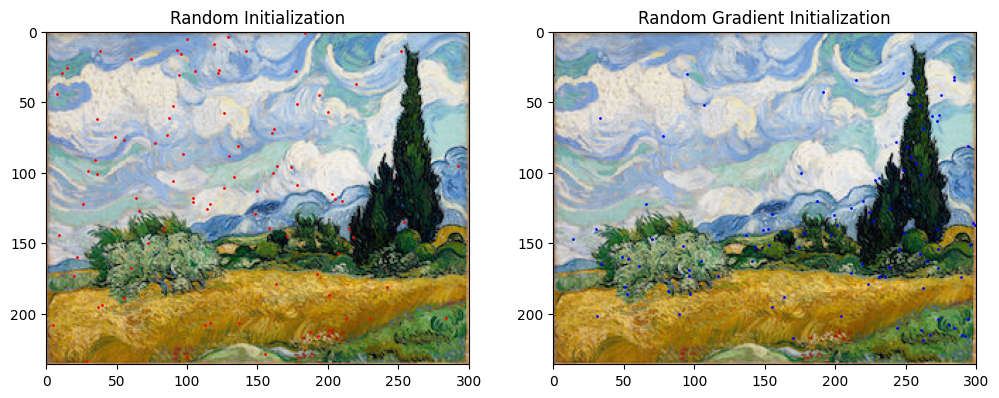

Plotting complete.


/home/tom/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [1]:
from PIL import Image
from vangogh.evolution import Evolution
from vangogh.fitness import draw_voronoi_image
from vangogh.util import IMAGE_SHRINK_SCALE, REFERENCE_IMAGE
from IPython.display import display, clear_output
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from mpl_toolkits.axes_grid1 import ImageGrid
plt.style.use('classic')
%matplotlib inline

from multiprocess import Pool, cpu_count

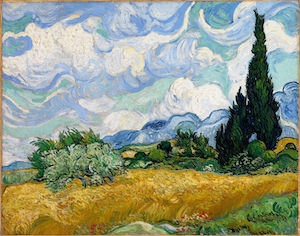

In [2]:
# Display the reference image to verify what it looks like
display(REFERENCE_IMAGE)

In [3]:
# Enable to show live rendering of best individual during optimization
display_output = False
# Enable to save progress images at every 50th generation
save_progress = True
# Enable to print verbose output per generation
verbose_output = True

In [4]:
def reporter(time, evo):
    if save_progress or display_output:
        elite = draw_voronoi_image(evo.elite, evo.reference_image.width, evo.reference_image.height, scale=IMAGE_SHRINK_SCALE)
    if display_output:
        clear_output()
        display(elite)
    if save_progress and time["num-generations"] % 50 == 0:
        elite.save(f"./img/van_gogh_intermediate_{evo.seed}_{evo.population_size}_{evo.crossover_method}_{evo.num_points}_{evo.initialization}_{evo.generation_budget}_{time['num-generations']:05d}.png")

def run_algorithm(settings):
    seed, population_size, crossover_method, num_points, initialization, generation_budget = settings
    start = time()
    
    data = []
    evo = Evolution(num_points,
                    REFERENCE_IMAGE,
                    population_size=population_size,
                    generation_reporter=reporter,
                    crossover_method=crossover_method,
                    seed=seed,
                    initialization=initialization,
                    generation_budget=generation_budget,
                    num_features_mutation_strength=.25,
                    selection_name='tournament_4',
                    verbose=verbose_output)
    data = evo.run()
    time_spent = time() - start
    print(f"Done: run {seed} - pop {population_size} - crossover {crossover_method} - num. points {num_points} - initialization {initialization} - in {int(time_spent)} seconds")
    
    return data

## Running a single instance

In [5]:
%%time
data = run_algorithm((0, 100, "ONE_POINT", 100, "RANDOM_GRADIENT", 500))

generation: 1 best fitness: 88332 avg. fitness: 100768.53


/home/tom/Evolutionary-Algorithm-Van-Gogh/vangogh/fitness.py:23: RuntimeWarning: overflow encountered in long_scalars
  coords.append((x * scale, y * scale))


generation: 2 best fitness: 88332 avg. fitness: 89762.53
generation: 3 best fitness: 88332 avg. fitness: 88507.39
generation: 4 best fitness: 88332 avg. fitness: 88333.12
generation: 5 best fitness: 88332 avg. fitness: 88332.0
generation: 6 best fitness: 88332 avg. fitness: 88332.0
generation: 7 best fitness: 88332 avg. fitness: 88332.0
generation: 8 best fitness: 88332 avg. fitness: 88332.0
generation: 9 best fitness: 88332 avg. fitness: 88332.0
generation: 10 best fitness: 88332 avg. fitness: 88332.0
generation: 11 best fitness: 88332 avg. fitness: 88332.0
generation: 12 best fitness: 88332 avg. fitness: 88332.0
generation: 13 best fitness: 88332 avg. fitness: 88332.0
generation: 14 best fitness: 88332 avg. fitness: 88332.0
generation: 15 best fitness: 88332 avg. fitness: 88332.0
generation: 16 best fitness: 88332 avg. fitness: 88332.0
generation: 17 best fitness: 88332 avg. fitness: 88332.0
generation: 18 best fitness: 88332 avg. fitness: 88332.0
generation: 19 best fitness: 88332 a

## Running a sweep of settings

In [6]:
%%time

generation_budget = 500
 
data = []
for seed in range(3):
    for population_size in (100,):
        for crossover_method in ("ONE_POINT",):
            for initialization in ("RANDOM","RANDOM_GRADIENT"):
                for num_points in (100,):
                    data.extend(run_algorithm((seed, population_size, crossover_method, num_points, initialization, generation_budget)))

generation: 1 best fitness: 134707 avg. fitness: 143610.45
generation: 2 best fitness: 134273 avg. fitness: 139705.69
generation: 3 best fitness: 131336 avg. fitness: 136312.15
generation: 4 best fitness: 127039 avg. fitness: 134125.79
generation: 5 best fitness: 127039 avg. fitness: 131832.41
generation: 6 best fitness: 123294 avg. fitness: 129270.83
generation: 7 best fitness: 123294 avg. fitness: 127130.28
generation: 8 best fitness: 119067 avg. fitness: 125220.76
generation: 9 best fitness: 118781 avg. fitness: 123393.09
generation: 10 best fitness: 117737 avg. fitness: 121603.97
generation: 11 best fitness: 111216 avg. fitness: 119460.74
generation: 12 best fitness: 111130 avg. fitness: 117245.38
generation: 13 best fitness: 109959 avg. fitness: 114954.43
generation: 14 best fitness: 109789 avg. fitness: 112285.59
generation: 15 best fitness: 109710 avg. fitness: 110793.16
generation: 16 best fitness: 108645 avg. fitness: 110036.45
generation: 17 best fitness: 106170 avg. fitness:

## Evaluating the results

In [7]:
df = pd.DataFrame(data)
df["time-elapsed"] = df["time-elapsed"].round(0)

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame for demonstration
data = [
    {'num-generations': i, 'initialization': 'RANDOM', 'best-fitness': np.random.randint(30000, 70000)} for i in range(1, 501)
] + [
    {'num-generations': i, 'initialization': 'RANDOM_GRADIENT', 'best-fitness': np.random.randint(30000, 70000)} for i in range(1, 501)
]

df = pd.DataFrame(data)

# Aggregating the data
df_stats = df.groupby(['num-generations', 'initialization']).agg(
    mean_fitness=('best-fitness', 'mean'),
    std_fitness=('best-fitness', 'std')
).reset_index()

# Ensure the DataFrame has the expected structure
print(df_stats.head())

# Plotting the data
sns.set_style("whitegrid")
custom_palette = sns.color_palette("husl", 3)

plt.figure(figsize=(10, 6))

for method, color in zip(df_stats['initialization'].unique(), custom_palette):
    method_data = df_stats[df_stats['initialization'] == method]
    plt.plot(method_data['num-generations'], method_data['mean_fitness'], label=method, color=color, linewidth=2)
    plt.fill_between(
        method_data['num-generations'],
        method_data['mean_fitness'] - method_data['std_fitness'],
        method_data['mean_fitness'] + method_data['std_fitness'],
        color=color,
        alpha=0.3
    )

plt.title('Fitness Convergence Over Time for Each Initialization Method', fontsize=16)
plt.xlabel('Number of Generations', fontsize=14)
plt.ylabel('Best Fitness', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Initialization Method', title_fontsize='14', fontsize='12', loc='best')
plt.tight_layout()
plt.show()


KeyError: 'time-elapsed'

## Displaying the best instances over time

In [ ]:
def show_progress_over_time(settings, selection=None, grid=(5,4)):
    seed, population_size, crossover_method, num_points, initialization, generation_budget = settings
    fig = plt.figure(figsize=(20., 20.))
    grid = ImageGrid(fig, 111, 
                     nrows_ncols=grid,
                     axes_pad=0.1,  # pad between axes
                     )

    if selection is None:
        selection = range(50, generation_budget + 50, 50)
    
    img_arr = [Image.open((f"./img/van_gogh_intermediate_{seed}_{population_size}_{crossover_method}_{num_points}_{initialization}_{generation_budget}_{i:05d}.png")) for i in selection]
    for ax, im in zip(grid, img_arr):
        ax.imshow(im)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [ ]:
show_progress_over_time((0, 100, 'ONE_POINT', 100, "RANDOM_GRADIENT", 500), grid=(0,5))